In [1]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

hidden_layer_sizes = []

i_max=10
j_max=10

a = np.array(range (1,i_max))
b = np.array(range (1,j_max))

ecart_i = 100
ecart_j = 100

for i in a : 
    hidden_layer_sizes.append((i*ecart_i,))
    for j in b :
        hidden_layer_sizes.append((i*ecart_i,j*ecart_j))
        
# affichage des couches de neurones que l'on va tester
hidden_layer_sizes

[(100,),
 (100, 100),
 (100, 200),
 (100, 300),
 (100, 400),
 (100, 500),
 (100, 600),
 (100, 700),
 (100, 800),
 (100, 900),
 (200,),
 (200, 100),
 (200, 200),
 (200, 300),
 (200, 400),
 (200, 500),
 (200, 600),
 (200, 700),
 (200, 800),
 (200, 900),
 (300,),
 (300, 100),
 (300, 200),
 (300, 300),
 (300, 400),
 (300, 500),
 (300, 600),
 (300, 700),
 (300, 800),
 (300, 900),
 (400,),
 (400, 100),
 (400, 200),
 (400, 300),
 (400, 400),
 (400, 500),
 (400, 600),
 (400, 700),
 (400, 800),
 (400, 900),
 (500,),
 (500, 100),
 (500, 200),
 (500, 300),
 (500, 400),
 (500, 500),
 (500, 600),
 (500, 700),
 (500, 800),
 (500, 900),
 (600,),
 (600, 100),
 (600, 200),
 (600, 300),
 (600, 400),
 (600, 500),
 (600, 600),
 (600, 700),
 (600, 800),
 (600, 900),
 (700,),
 (700, 100),
 (700, 200),
 (700, 300),
 (700, 400),
 (700, 500),
 (700, 600),
 (700, 700),
 (700, 800),
 (700, 900),
 (800,),
 (800, 100),
 (800, 200),
 (800, 300),
 (800, 400),
 (800, 500),
 (800, 600),
 (800, 700),
 (800, 800),
 (800

In [3]:
# Configuration des paramètres que l'on souhaite tester

tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)


90

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


def draw(ylim, clf, i_max=9, j_max=9, ecart_i=50, ecart_j=50):
    # Configuration de la présentation des axes
    plt.ylim(ylim)

    axes = plt.gca()

    # Récupération de tout les scores
    scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

    # Scores avec traitement supplémentaires
    scores2 = []
    legend2 = []
    colors2 = ['#e6194b', '#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#000000']
    x = np.arange(0,i_max*ecart_i,ecart_i)
    for i in range (0,i_max-1) :
        scores2.append([])
        for j in range (0,j_max) :
            scores2[i].append(scores[i * i_max + j])

        plt.plot(x, scores2[i], color=colors2[i])
        legend2.append("Hidden Layer Size : (" + str((i+1)*ecart_i) +", x)")


    plt.legend(legend2) 

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.show()




# Dataset BRUT

In [5]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [6]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [7]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
106,0.503510,-3.518753,-2.946533,-9.230118,-21.196335,-12.286316,-10.726501,-6.382217,-7.074142,-10.019012,...,-3.308914,-14.347382,-23.221497,-18.089523,-14.969879,-7.580170,-10.284424,0,1,0
73,-1.053925,-0.616974,-1.460938,-0.933014,-0.512833,-0.691193,-1.263412,-0.887527,-1.118561,-0.072296,...,13.458878,12.891464,11.387894,10.910248,12.555069,12.760971,14.592529,0,0,1
105,-7.390182,-6.358276,-4.369888,-1.484879,-4.575790,-4.708664,-8.538193,-6.213425,-7.898941,-12.359344,...,-9.102875,-7.587357,-10.253296,-15.593567,-21.775391,-7.746552,-12.339828,0,1,0
162,0.308380,-3.009979,-3.189545,-1.227493,-0.923431,-1.118561,-1.404678,-5.350311,-16.586304,-9.098434,...,-15.454697,-34.895615,-26.371063,-12.691788,-8.126053,-8.849106,-11.248077,1,0,0
137,1.742508,1.062561,-2.314468,-4.161591,-5.387421,-25.583710,-35.921875,-38.531555,-37.582260,-39.862732,...,1.479477,-5.677963,-22.746246,-69.761185,-13.102386,-33.103561,-45.879013,0,0,1
100,-6.857468,-7.214203,-11.194565,-15.863251,-9.752060,-5.777679,-4.800842,-3.563049,-4.405807,-6.199066,...,-14.327042,-19.594269,-16.218445,-12.835449,-7.744171,-7.710648,-10.920074,0,1,0
224,0.298798,-0.304535,0.423309,0.113251,-0.001663,-0.256653,-0.701965,-0.020828,1.288803,2.859406,...,12.203125,14.796051,12.966873,13.333191,13.632477,12.579010,13.211075,0,0,1
382,0.473587,0.666321,1.570129,2.739685,3.343033,-0.388336,-4.379471,-2.254608,-0.715134,1.820313,...,11.693146,12.270157,16.560577,19.594009,13.400223,9.776611,6.133820,0,0,1
514,0.034241,-0.494873,-0.215942,-0.249466,-0.089050,-1.444168,-1.970901,-1.220322,-0.002869,-0.067505,...,12.874695,12.300079,12.992020,14.533875,14.102936,11.433380,10.454147,0,0,1
281,-1.428619,-0.518814,-1.261017,-0.151306,0.740540,0.150360,3.353806,2.612793,1.451614,0.747711,...,9.102631,10.456543,9.282196,8.196426,12.124100,7.407532,7.344086,0,0,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
489,-9.645508,-9.297150,-9.803528,-9.971130,-10.548126,-11.620728,-10.463135,-11.358566,-11.055695,-10.111191,...,2.955521,6.296631,5.231201,7.551193,9.971741,9.860382,12.051086,0,0,1
469,-2.145676,5.169800,15.764145,-11.289139,6.721252,32.100983,31.261810,5.119522,26.982178,29.334488,...,20.823456,4.844543,74.233292,-13.469894,-57.992477,-1.952606,51.649994,0,0,1
256,-1.264603,-1.102997,-0.770203,-0.007660,-0.663666,-0.158493,0.006714,-0.279388,-2.472488,-0.820480,...,3.253586,4.897202,15.292831,16.422897,19.317505,13.440918,11.640488,0,0,1
260,0.733353,0.435272,0.513092,-0.557129,1.205002,1.375000,1.550964,3.017426,3.378937,-1.375946,...,21.364532,18.333466,14.470428,13.217072,12.630493,14.007141,13.342773,0,0,1
225,-0.885132,-0.645706,-1.102997,-1.595016,-0.950974,-0.223129,-0.236298,-1.102997,-0.535568,-0.694794,...,12.425781,12.914200,11.505219,11.900253,12.115738,11.307693,12.103760,0,0,1
555,-9.650299,-9.547348,-12.528137,-9.954361,-9.588058,-10.327866,-11.911621,-9.881348,-8.514252,-6.044632,...,7.308182,8.652512,10.243469,12.264160,12.936951,13.068619,13.790482,0,0,1
72,1.276840,0.514282,-0.400299,-0.759430,-1.906250,0.332321,-0.469742,0.041428,0.254517,0.997910,...,14.027512,15.010330,15.424515,11.685974,12.156433,12.290512,13.494781,0,0,1
464,2.035797,2.149521,2.215363,2.023819,2.197403,2.433228,1.950806,2.262054,1.784409,1.603638,...,12.013962,12.834000,12.905823,13.268524,12.844772,15.100098,15.019897,0,0,1
259,-0.033997,0.031845,0.422104,0.523865,0.461609,1.260071,0.455627,2.269226,3.404083,6.890045,...,-0.101883,5.753143,12.401840,36.637161,13.478027,11.687164,15.550217,0,0,1
388,-0.839645,0.170715,0.100082,-3.096176,-0.996460,-5.292847,-2.666412,1.616806,1.415695,-1.584229,...,15.863846,14.644028,11.630920,9.954971,9.898697,10.393112,10.645691,0,0,1


,Action
106,Marcher
73,Marcher
105,Marcher
162,Marcher
137,Sauter
100,Marcher
224,Se lever (chaise)
382,Se lever (depuis position allongée)
514,Marcher
281,S'allonger (depuis position debout)


,Action
489,S'assoir (depuis position allongée)
469,Courrir
256,Sauter
260,Sauter
225,Se lever (chaise)
555,S'assoir (depuis position allongée)
72,Marcher
464,Ne rien faire
259,Sauter
388,Se lever (depuis position allongée)


In [8]:
warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.2s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.2s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.3s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.5s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.6s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.6s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.7s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.7s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.1s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.1s
[CV] hidden_layer_sizes=(300, 500) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   0.8s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.9s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.0s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.0s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 700) -   0.4s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.4s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.5s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   1.6s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   1.4s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   2.1s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.4s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   1.8s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .............................. hidden_layer_sizes=(700,) -   0.6s
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.6s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.6s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.8s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.8s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 200) -   1.2s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.5s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.6s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.4s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.2s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .......................... hidden_layer_sizes=(900, 300) -   1.8s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .......................... hidden_layer_sizes=(900, 300) -   1.2s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  6.5min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 700), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.627 (+/-0.023) for {'hidden_layer_sizes': (100,)}
0.698 (+/-0.034) for {'hidden_layer_sizes': (100, 100)}
0.716 (+/-0.041) for {'hidden_layer_sizes': (100, 200)}
0.716 (+/-0.034) for {'hidden_layer_sizes': (100, 300)}
0.710 (+/-0.036) for {'hidden_layer_sizes': (100, 400)}
0.728 (+/-0.026) for {'hidden_layer_sizes': (100, 500)}
0.728 (+/-0.021) for {'hidden_layer_sizes': (100, 600)}
0.704 (+/-0.036) for {'hidden_layer_sizes': (100, 700)}
0.698 (+/-0.055) for {'hidden_layer_s

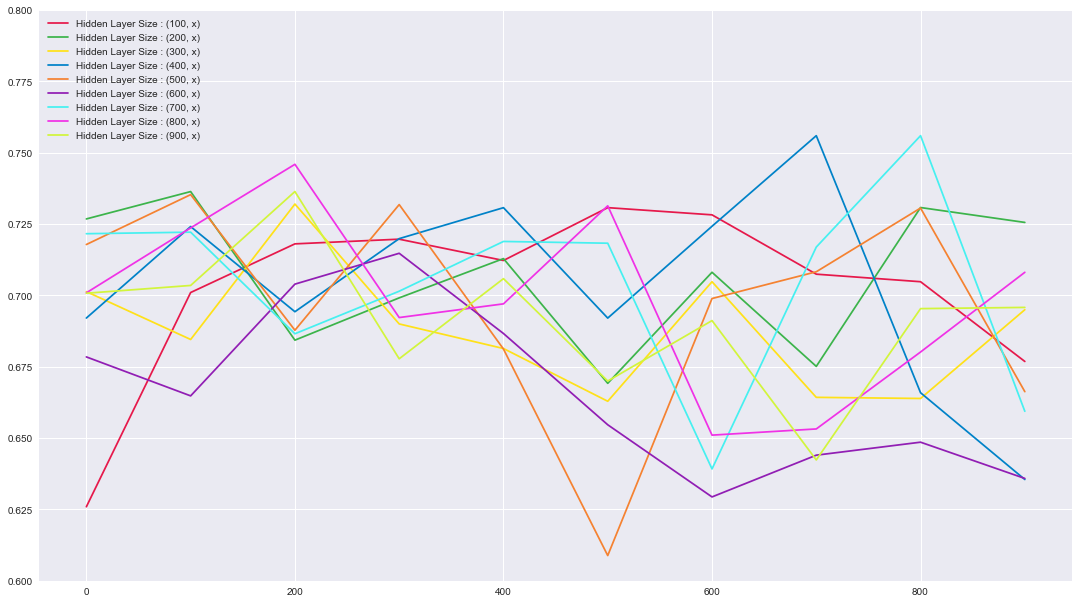

In [9]:
# Affichage des courbes
draw([0.6,0.8], clf, i_max, j_max, ecart_i, ecart_j)

In [10]:
warnings.filterwarnings('ignore')

clf_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_demo.fit(source_train, cible_train.values.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
warnings.filterwarnings('ignore')

for i in range(0,20):
    print("prédit : ", clf_demo.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Sauter'] 
 attendu :  ['Courrir']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ["S'a

# Dataset ANALYSE

In [12]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed


In [13]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [14]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,min_x,min_y,min_z,min_t,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_t,ecart_type_xyz
84,-0.060333,-0.086670,-0.095047,-0.044769,-0.074692,-0.110611,-0.102219,-0.063919,-0.083069,-0.126160,...,-0.126160,8.871490,3.992889,12.923767,-0.126160,0.026370,0.033996,0.177524,0.154609,3.721805
284,-0.031601,0.067764,-0.107010,0.620819,1.471970,0.487946,2.155502,-0.986877,4.987854,2.942001,...,-3.973648,-0.024155,-6.770233,-2.054352,-6.770233,2.105030,3.222869,6.244745,5.163045,4.752553
316,3.502243,1.912491,1.718567,1.623993,1.844254,0.879395,3.254440,-0.476913,3.756027,3.350220,...,-4.687119,0.209274,-0.514191,5.990173,-4.687119,3.059795,3.326088,2.872385,5.434510,3.825910
237,0.232956,-0.757034,0.363449,-0.089050,0.207825,0.353867,0.988327,0.211411,0.404144,0.747711,...,-0.757034,5.420258,3.312943,9.264236,-0.757034,0.353500,1.379806,1.838349,2.487524,3.610578
327,1.731735,2.299164,1.720963,1.753281,0.729767,1.215790,1.063751,-0.097443,1.922073,1.263672,...,-0.097443,8.763763,2.214005,12.719070,-0.097443,0.562196,0.353240,0.463202,0.451663,3.587977
16,0.384995,0.212616,-0.044769,-0.227921,-0.002869,-0.437408,-0.716339,-0.656479,-0.278198,-0.321289,...,-0.716339,4.587067,4.548355,9.310928,-0.716339,0.465857,1.211235,2.463008,2.190577,3.640757
78,-1.119766,1.667084,0.384995,-0.205170,-0.007660,-0.357208,-1.280167,-1.104202,-1.299332,-0.298553,...,-1.793732,1.573975,6.858749,10.332062,-1.793732,1.080493,1.223781,1.463390,1.460201,3.966192
171,0.139587,-0.047165,0.068954,-0.346436,0.383804,-0.569092,-0.129761,0.459213,-0.084274,-0.237503,...,-0.688797,6.824448,4.198792,12.325226,-0.688797,0.354655,0.724037,1.073352,1.085640,3.500254
292,1.643143,0.677094,0.680679,0.225784,2.209381,-0.935410,-0.497269,-2.520370,-1.079056,0.298798,...,-16.728760,-1.259567,-10.939743,-28.306778,-16.728760,5.287862,4.232991,5.328085,13.297628,6.100048
51,-0.449387,-0.201584,0.358658,1.639557,4.011017,4.584427,4.167831,1.623993,2.036987,5.048904,...,-0.449387,-3.410751,-5.162537,2.323441,-5.162537,4.525748,3.966477,4.752761,4.813575,4.594495


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,min_x,min_y,min_z,min_t,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_t,ecart_type_xyz
31,0.098892,-0.126160,0.911713,-0.229111,1.307953,1.877777,-0.836044,0.066559,2.398514,2.366196,...,-28.936798,-5.873199,-34.732117,-53.703262,-34.732117,7.549443,4.344355,9.991771,18.822951,8.298067
220,-0.619370,-0.626556,-0.557129,-0.684021,-0.705566,1.058960,-1.010818,-0.285385,-0.146515,-0.048355,...,-1.595016,8.150848,1.119858,10.097412,-1.595016,0.574582,0.495531,1.166590,1.393497,4.193384
61,-0.323685,0.023468,-0.156097,0.082123,0.452026,0.377808,0.357468,0.800385,0.661530,1.110443,...,-0.323685,-1.102753,-13.836731,-10.447220,-13.836731,0.633449,4.185555,6.325136,9.566133,5.876362
147,-12.429962,-26.886154,-30.141083,-23.879044,-39.862732,-39.862732,-22.086975,2.574493,1.382187,3.472321,...,-39.862732,-38.746780,-5.102676,-69.519363,-39.862732,15.565917,14.714521,10.942583,23.490521,17.024132
130,0.528641,-0.297348,-0.735489,-1.571060,-1.063492,-2.082230,-1.336441,-2.189972,-2.841187,-3.309265,...,-3.596558,2.367645,5.980087,7.895966,-3.596558,1.447688,1.281660,2.406855,1.854702,4.350036
532,11.903503,-3.033920,-0.257843,24.323425,26.081955,-9.966339,3.222122,38.317535,12.224319,7.975815,...,-9.966339,-38.069229,-25.000885,-56.022064,-38.069229,14.258088,17.174667,18.904666,40.483752,17.527607
537,-0.609802,-0.836044,-0.904282,-0.262634,-1.147293,1.348663,1.409714,1.827499,4.037354,5.773148,...,-4.271729,-6.621384,-2.884445,2.517380,-6.621384,6.337014,5.964886,3.925528,6.923231,5.473658
215,-0.625351,-0.812103,-0.136948,-0.601410,0.159943,-1.247849,-0.000473,-0.832458,-0.970123,0.096497,...,-1.741058,8.286118,1.656158,10.235092,-1.741058,0.539031,0.566711,1.331595,1.343563,4.142440
226,-0.684021,-0.870758,-0.241089,-0.268616,-1.164047,-0.280594,0.590897,-0.911469,0.236557,-0.966537,...,-1.739853,7.369141,0.943878,8.828506,-1.739853,0.840712,0.709154,1.836860,1.922478,3.955064
200,0.616043,0.258102,-0.031601,0.185074,0.163528,-0.142929,1.633575,-1.155670,-1.190384,-0.038773,...,-1.190384,7.316467,2.385193,10.219528,-1.190384,0.718970,0.799974,1.466624,1.926504,3.793900


,Action
84,Ne rien faire
284,S'allonger (depuis position debout)
316,Courrir
237,Se lever (chaise)
327,Ne rien faire
16,S'assoir (chaise)
78,Marcher
171,S'assoir (chaise)
292,S'allonger (depuis position debout)
51,S'allonger (depuis position assise)


,Action
31,S'allonger (depuis position debout)
220,Se lever (chaise)
61,S'allonger (depuis position assise)
147,Sauter
130,S'assoir (chaise)
532,Courrir
537,S'allonger (depuis position debout)
215,Se lever (chaise)
226,Se lever (chaise)
200,S'assoir (chaise)


In [15]:
warnings.filterwarnings('ignore')

# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 100) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.5s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.7s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.9s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   1.0s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.9s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.5s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   1.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.7s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.0s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.0s
[CV] hidden_layer_sizes=(500, 600) ...................................
[CV] .......................... hidden_layer_sizes=(500, 600) -   1.4s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.9s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.4s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.6s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   0.2s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.3s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   0.4s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.0s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   2.4s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(700, 900) -   3.0s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.1s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.7s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.6s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.1s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.1s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.9s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.9s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   1.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.6s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.2s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.5s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.2s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  6.5min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(700, 700), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.692 (+/-0.037) for {'hidden_layer_sizes': (100,)}
0.704 (+/-0.019) for {'hidden_layer_sizes': (100, 100)}
0.716 (+/-0.040) for {'hidden_layer_sizes': (100, 200)}
0.722 (+/-0.027) for {'hidden_layer_sizes': (100, 300)}
0.728 (+/-0.043) for {'hidden_layer_sizes': (100, 400)}
0.763 (+/-0.025) for {'hidden_layer_sizes': (100, 500)}
0.728 (+/-0.029) for {'hidden_layer_sizes': (100, 600)}
0.698 (+/-0.065) for {'hidden_layer_sizes': (100, 700)}
0.692 (+/-0.068) for {'hidden_layer_s

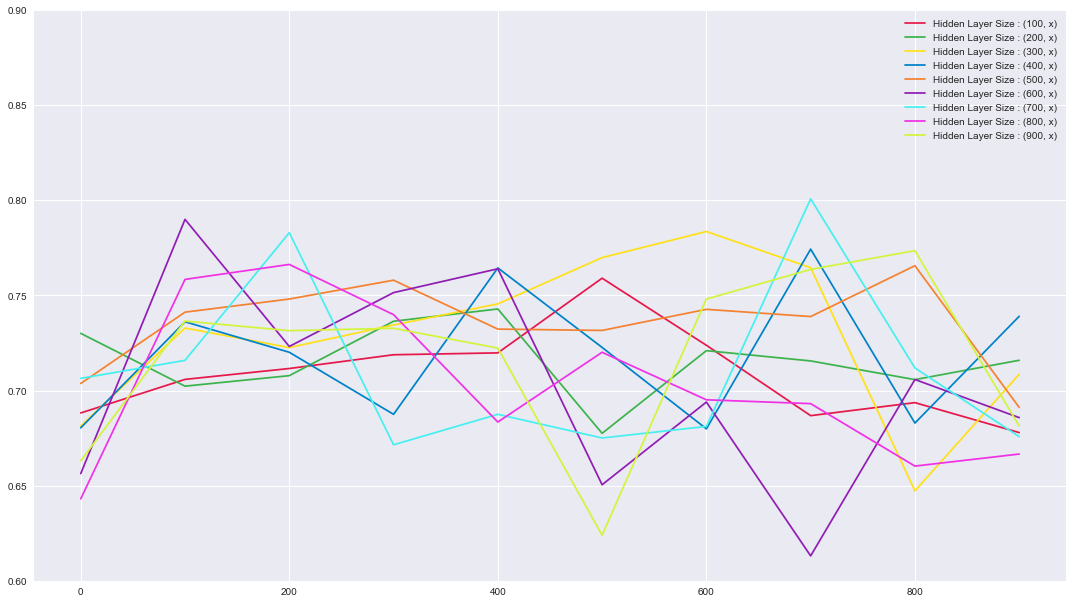

In [16]:
# Affichage des courbes
draw([0.6,0.9], clf_analysed, i_max, j_max, ecart_i, ecart_j)

In [17]:
# TODO copier coller le best classifier
clf_analysed_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_analysed_demo.fit(source_train_analysed, cible_train_analysed.values.ravel())



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:

for i in range(0,20):
    print("prédit : ", clf_analysed_demo.predict(source_test_analysed.values[i]),"\n attendu : ",cible_test_analysed.values[i])


prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Marcher'] 
 attendu :  ['Sauter']
prédit :  ['Marcher'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ['Courrir']
prédit :  


# Dataset ANALYSE 2

In [19]:

# Récupération des données analysé sans les données brutes (DONNEES ANALYSEES 2)
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2


In [20]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2 = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)


In [21]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_x,moyenne_y,moyenne_z,moyenne_t,moyenne_xyz,max_x,max_y,...,min_x,min_y,min_z,min_t,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_t,ecart_type_xyz
475,0,0,1,3.609505,5.246557,3.291693,12.147755,4.049252,14.049896,16.714905,...,-1.708740,-2.797836,-2.244003,2.025360,-2.797836,5.441124,5.205450,3.421995,4.657187,4.772548
449,0,0,1,-2.107548,8.099007,6.473349,12.464808,4.154936,0.760880,26.786118,...,-9.792755,-5.866013,-7.141342,-4.137299,-9.792755,2.537123,9.219610,9.643705,16.021727,8.932264
268,0,0,1,0.365962,5.903524,3.257336,9.526822,3.175607,4.789124,12.758484,...,-2.795700,-1.216476,-9.712708,-1.227142,-9.712708,1.821715,3.209247,6.420935,4.776434,4.781543
293,0,0,1,-4.403767,5.518538,1.816984,2.931755,0.977252,1.151138,13.145142,...,-17.425476,-1.024933,-8.266617,-23.268188,-17.425476,5.563769,4.068094,4.621848,12.708194,6.262800
264,0,0,1,1.239846,6.170239,7.069084,14.479170,4.826390,10.923080,21.836105,...,-3.551071,1.832550,0.611084,3.441544,-3.551071,3.175432,4.454867,4.574419,7.973351,4.801507
457,0,0,1,-0.685334,5.705403,8.067407,13.087476,4.362492,1.567734,9.452087,...,-5.686707,3.889160,5.272598,9.298950,-5.686707,1.750985,1.327671,1.878489,2.146941,4.073472
70,0,0,1,0.014909,5.334661,8.230452,13.580022,4.526674,1.339081,6.732285,...,-1.415451,3.859238,6.727066,11.253815,-1.415451,0.678686,0.757293,1.197400,1.376142,3.544933
477,0,0,1,4.640390,4.916154,3.154984,12.711528,4.237176,20.230530,14.534973,...,-4.271729,-6.621384,-2.884445,2.517380,-6.621384,6.337014,5.964886,3.925528,6.923231,5.473658
510,0,0,1,-1.253656,8.172329,6.647884,13.566557,4.522186,1.675476,29.623245,...,-7.552979,-5.420685,-6.802567,-8.713837,-7.552979,2.433544,9.596158,10.818563,17.350247,9.306453
390,0,0,1,-5.985138,3.186344,3.301688,0.502894,0.167631,1.440842,9.089371,...,-11.527359,-1.179367,-4.233582,-16.940308,-11.527359,4.729126,2.896256,4.654186,11.159452,6.010870


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_x,moyenne_y,moyenne_z,moyenne_t,moyenne_xyz,max_x,max_y,...,min_x,min_y,min_z,min_t,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_t,ecart_type_xyz
485,0,0,1,4.829591,5.183887,0.492992,10.506470,3.502157,13.093414,9.624466,...,-1.278976,-2.475830,-6.284210,2.641876,-6.284210,5.429088,4.491599,2.942764,3.081753,4.837678
408,0,0,1,5.709877,4.992290,1.455700,12.157867,4.052622,12.922226,9.966843,...,-1.949356,-2.190918,-6.468567,4.755951,-6.468567,4.993464,4.335690,3.083244,3.861400,4.545469
172,0,0,1,0.140968,8.603944,4.700262,13.445174,4.481725,2.564911,9.847137,...,-0.757034,6.813675,2.550385,9.270218,-0.757034,0.832649,0.749898,1.013254,1.690752,3.591461
492,0,0,1,5.596214,3.801175,3.551884,12.949273,4.316424,10.545990,9.510742,...,-5.233002,-2.819397,-0.357376,4.418381,-5.233002,5.437428,3.783987,2.575321,5.027075,4.136588
437,0,0,1,-5.479778,4.725277,1.956386,1.201884,0.400628,1.664703,9.824387,...,-12.981827,-0.995010,-0.969086,-11.883743,-12.981827,5.706686,4.131288,1.696342,10.337008,5.982686
332,0,0,1,1.185197,9.219793,3.417330,13.822320,4.607440,1.528229,9.562225,...,0.583710,8.931351,3.079514,13.650421,0.583710,0.220348,0.195353,0.220136,0.164805,3.421286
368,0,0,1,-0.321295,9.776446,1.729655,11.184805,3.728268,2.579285,12.839890,...,-3.603745,5.907471,-3.511734,4.219666,-3.603745,1.489485,1.838799,3.290830,3.065622,4.960239
420,0,0,1,1.450834,7.642193,-0.457208,8.635818,2.878606,6.301071,11.092117,...,-1.727890,2.757904,-10.667999,-4.228287,-10.667999,2.309328,2.547596,5.780215,6.548424,5.169348
359,0,0,1,0.292757,9.655299,3.031504,12.979560,4.326520,2.214172,13.246902,...,-3.801270,7.899445,-2.345749,8.696808,-3.801270,1.750955,1.421424,2.867108,2.147860,4.471585
194,0,0,1,-0.357626,9.300898,2.978053,11.921324,3.973775,0.606461,11.404556,...,-2.599380,7.306885,0.354904,7.190857,-2.599380,0.757953,0.788252,1.754582,1.913885,4.206186


,Action
475,S'allonger (depuis position debout)
449,Sauter
268,S'allonger (depuis position debout)
293,S'allonger (depuis position debout)
264,Sauter
457,Marcher
70,Marcher
477,S'allonger (depuis position debout)
510,Sauter
390,Se lever (depuis position allongée)


,Action
485,S'allonger (depuis position assise)
408,S'allonger (depuis position assise)
172,S'assoir (chaise)
492,S'assoir (depuis position allongée)
437,S'assoir (depuis position allongée)
332,Ne rien faire
368,Se lever (depuis position allongée)
420,S'allonger (depuis position assise)
359,Se lever (depuis position allongée)
194,S'assoir (chaise)


In [22]:
warnings.filterwarnings('ignore')

# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed_2 = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed_2.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed_2.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed_2.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed_2, cible_pred_analysed_2 = cible_test_analysed_2, clf_analysed_2.predict(source_test_analysed_2)
    print(classification_report(cible_true_analysed_2, cible_pred_analysed_2))
    
    
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.9s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   1.0s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   1.2s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   1.2s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   1.1s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   1.2s
[CV] hidden_layer_sizes=(300, 500) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   1.4s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.3s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.4s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   2.3s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   2.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.4s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.7s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.9s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.0s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.4s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.0s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   3.3s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   2.3s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.7s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.8s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   3.6s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   2.9s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.1s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.1s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.8s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.6s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.5s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.5s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.4s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.3s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  9.5min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 700), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.704 (+/-0.022) for {'hidden_layer_sizes': (100,)}
0.734 (+/-0.041) for {'hidden_layer_sizes': (100, 100)}
0.728 (+/-0.037) for {'hidden_layer_sizes': (100, 200)}
0.775 (+/-0.042) for {'hidden_layer_sizes': (100, 300)}
0.728 (+/-0.052) for {'hidden_layer_sizes': (100, 400)}
0.751 (+/-0.046) for {'hidden_layer_sizes': (100, 500)}
0.734 (+/-0.024) for {'hidden_layer_sizes': (100, 600)}
0.787 (+/-0.041) for {'hidden_layer_sizes': (100, 700)}
0.728 (+/-0.045) for {'hidden_layer_s

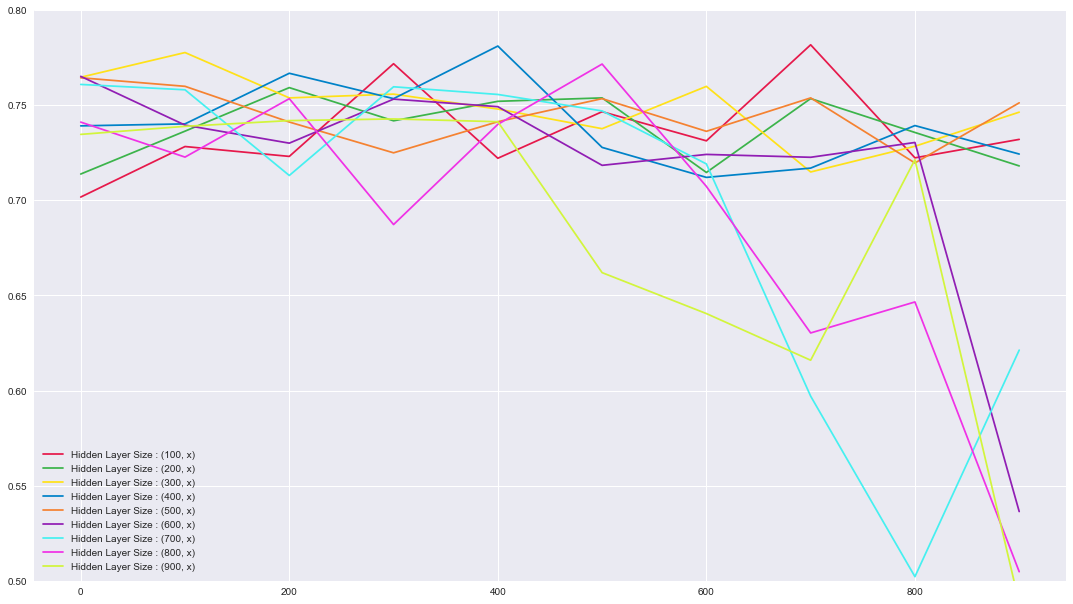

In [23]:
%matplotlib inline

# Affichage des courbes
draw([0.50,0.80], clf_analysed_2, i_max, j_max, ecart_i, ecart_j)


In [24]:
# TODO copier coller le best classifier
clf_analysed_2_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_analysed_2_demo.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:

for i in range(0,20):
    print("prédit : ", clf_analysed_2_demo.predict(source_test_analysed_2.values[i]),"\n attendu : ",cible_test_analysed_2.values[i])


prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  